In [1]:
import pandas as pd
import seaborn as sns 
from sklearn import tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
dt = pd.read_csv('E:\\ML\\decision tree\\tipnotip.csv')

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Cust_No   17 non-null     int64 
 1   Food      17 non-null     int64 
 2   Ambience  17 non-null     int64 
 3   TipNoTip  17 non-null     object
dtypes: int64(3), object(1)
memory usage: 672.0+ bytes


<AxesSubplot:xlabel='Food', ylabel='Ambience'>

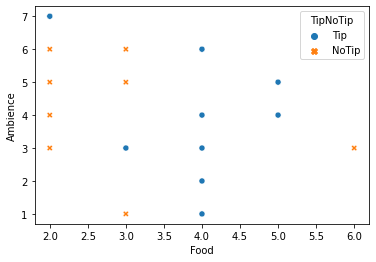

In [4]:
sns.scatterplot(data=dt,x='Food',y='Ambience',hue='TipNoTip',style='TipNoTip')

In [5]:
dt.TipNoTip.value_counts()

Tip      9
NoTip    8
Name: TipNoTip, dtype: int64

In [6]:
X = dt.iloc[:,[1,2]]
y = dt.iloc[:,dt.columns == 'TipNoTip']

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X,y)
y_pred_proba = clf.predict_proba(X)
y_pred= clf.predict(X)
y_pred
clf.score(X,y)

0.9411764705882353

In [7]:
pd.crosstab(dt.TipNoTip,y_pred,margins= True)

col_0,NoTip,Tip,All
TipNoTip,,,
NoTip,8,0,8
Tip,1,8,9
All,9,8,17


In [8]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

       NoTip       0.89      1.00      0.94         8
         Tip       1.00      0.89      0.94         9

    accuracy                           0.94        17
   macro avg       0.94      0.94      0.94        17
weighted avg       0.95      0.94      0.94        17



In [9]:
y_pred

array(['Tip', 'NoTip', 'Tip', 'Tip', 'Tip', 'Tip', 'Tip', 'Tip', 'Tip',
       'NoTip', 'NoTip', 'NoTip', 'NoTip', 'NoTip', 'NoTip', 'NoTip',
       'NoTip'], dtype=object)

In [10]:
y_pred_proba

array([[0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

[Text(0.5555555555555556, 0.875, 'X[0] <= 3.5\ngini = 0.498\nsamples = 17\nvalue = [8, 9]'),
 Text(0.3333333333333333, 0.625, 'X[1] <= 6.5\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.2222222222222222, 0.375, 'X[1] <= 3.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7777777777777778, 0.625, 'X[0] <= 5.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

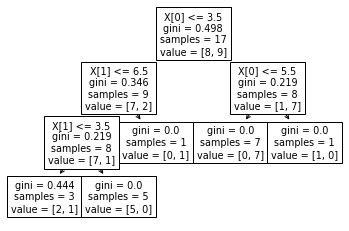

In [11]:
tree.plot_tree(clf)

# predicting salary greater than 100K using Decision Tree 

In [12]:
url = 'https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/salaries.csv'
dt_salary = pd.read_csv(url)

In [13]:
dt_salary

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [14]:
inputs = dt_salary.drop('salary_more_then_100k', axis =1)
target = dt_salary['salary_more_then_100k']

In [15]:
inputs.columns

Index(['company', 'job', 'degree'], dtype='object')

In [16]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [18]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [19]:
inputs_n=inputs.drop(['company','job','degree'], axis=1)

In [20]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [21]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [22]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [23]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [24]:
model.score(inputs_n, target)

1.0

### Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?

In [25]:
model.predict([[2,1,0]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

### Is salary of Google, Computer Engineer, Masters degree > 100 k ?

In [26]:
model.predict([[2,1,1]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# -------------------------------END------------------------------------------------------------

# ____titanic_train.csv______

In [27]:
titanic = pd.read_csv('titanic_train.csv')

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
titanic = titanic.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)

In [30]:
titanic

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [31]:
iv = titanic.drop(['Survived'],axis=1)

In [32]:
tv = titanic['Survived']

In [33]:
iv.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [34]:
iv.Sex = iv.Sex.map({'male': 1, 'female': 2})

In [35]:
iv.Sex.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Sex
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [36]:
iv.head(10)

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500
5,3,1,NaN,8.4583
6,1,1,54.0,51.8625
7,3,1,2.0,21.0750
8,3,2,27.0,11.1333
9,2,2,14.0,30.0708


In [37]:
iv.Age = iv.Age.fillna(iv.Age.median())

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test = train_test_split(iv,tv,test_size=0.3,random_state=0,shuffle=False)

In [40]:
print(len(x_train))
print(len(x_test))

623
268


In [41]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [42]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
model.score(x_test,y_test)

0.7910447761194029

# ------------------- IRIS DATASET--------------------------

In [44]:
from sklearn.datasets import load_iris

In [45]:
iris = load_iris()

In [46]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [47]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [49]:
clf = DecisionTreeClassifier()
clf.fit(iris.data,iris.target)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

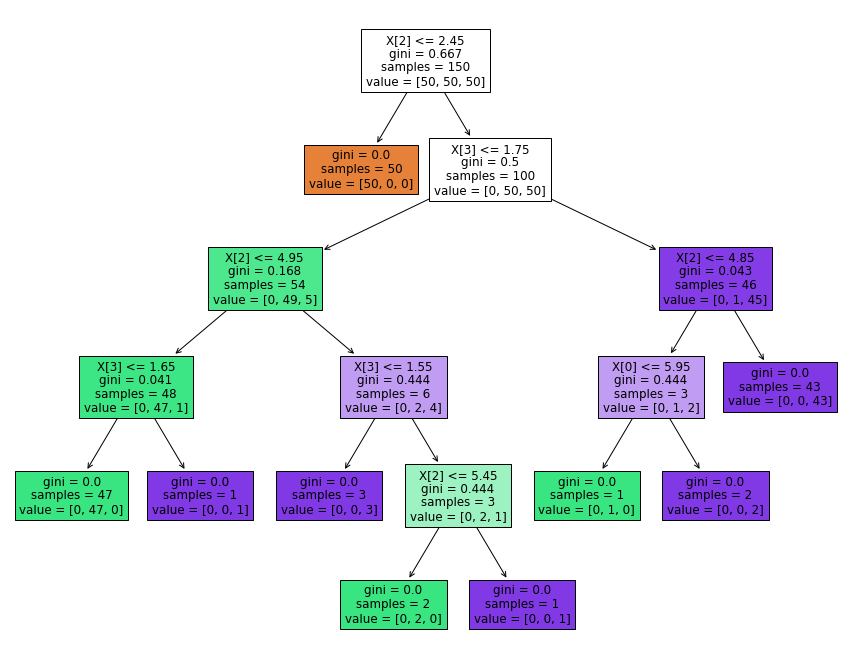

In [50]:
plt.figure(figsize=(15,12))
tree.plot_tree(clf,filled=True)


# ***************Heart Disease Prediction***************

In [51]:
hd=pd.read_csv('E:\ML\decision tree\HeartDisease.csv')

In [52]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [53]:
hd.head(50)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [54]:
for column in hd.iloc[:,1:]:
    print(hd[column].value_counts())


1    207
0     96
Name: gender, dtype: int64
0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: rest_bps, dtype: int64
204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: cholestrol, Length: 152, dtype: int64
0    258
1     45
Name: fasting_blood_sugar, dtype: int64
1    152
0    147
2      4
Name: rest_ecg, dtype: int64
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Na

In [55]:
categorical = hd[['gender','fasting_blood_sugar','exer_angina']]
contineous = hd.drop(['gender','fasting_blood_sugar','exer_angina','target'],axis=1)
input_hd = hd.drop(['target'], axis=1)
target_hd = hd['target']

In [56]:
# contineous

In [57]:
# for column in categorical:
#     crstab = pd.crosstab(hd['target'],categorical[column])
#     print(crstab)

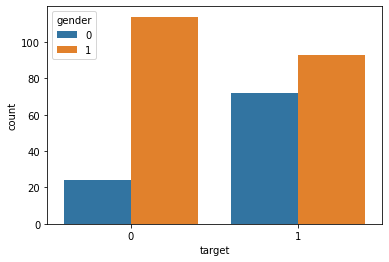

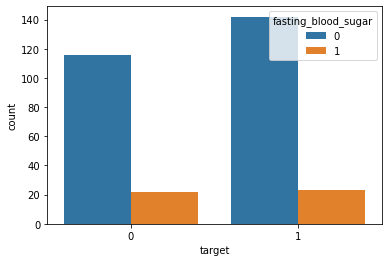

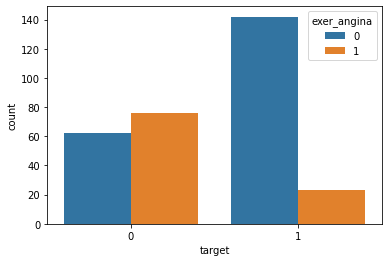

In [58]:
import matplotlib.pyplot as plt
for column in categorical:
    sns.countplot(x=hd['target'],hue=categorical[column])
    plt.show()

In [59]:
# from scipy.stats import chi2_contingency

# (stats,p,df,_) = chi2_contingency([crstab.iloc[0].values, crstab.iloc[1].values], correction=False)
# print(column,"","p-value","",p)

In [60]:
hd.thalassemia.replace([0,1,2,3],[1,2,3,4],inplace=True)

In [61]:
hd.thalassemia.value_counts()

3    166
4    117
2     18
1      2
Name: thalassemia, dtype: int64

In [62]:
hd.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [63]:
hd.ca.replace([0,1,2,3],[1,2,3,4], inplace=True)

In [64]:
hd.ca.value_counts()

1    175
2     65
3     38
4     25
Name: ca, dtype: int64

In [65]:
hd.chest_pain.value_counts()

0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64

In [66]:
hd.chest_pain.replace([0,1,2,3],[1,2,3,4], inplace=True)

In [67]:
hd.chest_pain.value_counts()

1    143
3     87
2     50
4     23
Name: chest_pain, dtype: int64

In [68]:
contineous = hd.drop(['gender','fasting_blood_sugar','exer_angina','target'],axis=1)

In [69]:
contineous

,age,chest_pain,rest_bps,cholestrol,rest_ecg,thalach,old_peak,slope,ca,thalassemia
0,63,4,145,233,0,150,2.3,0,1,2
1,37,3,130,250,1,187,3.5,0,1,3
2,41,2,130,204,0,172,1.4,2,1,3
3,56,2,120,236,1,178,0.8,2,1,3
4,57,1,120,354,1,163,0.6,2,1,3
...,...,...,...,...,...,...,...,...,...,...
298,57,1,140,241,1,123,0.2,1,1,4
299,45,4,110,264,1,132,1.2,1,1,4
300,68,1,144,193,1,141,3.4,1,3,4
301,57,1,130,131,1,115,1.2,1,2,4


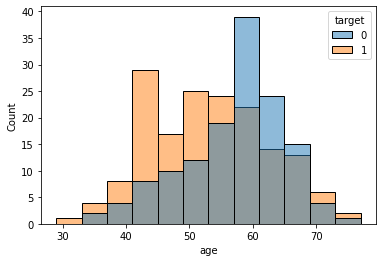

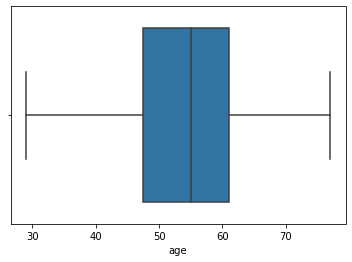

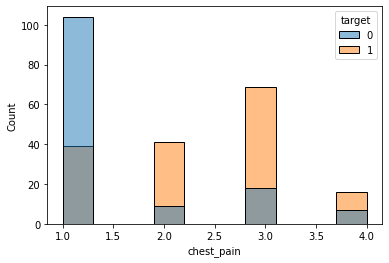

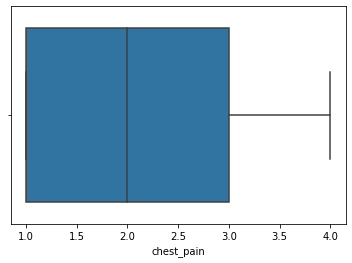

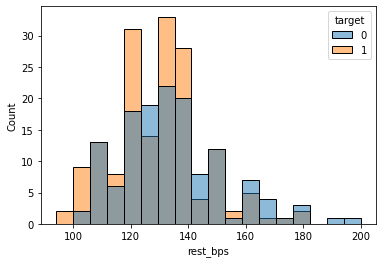

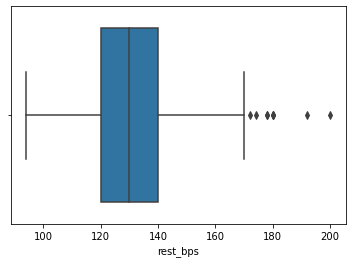

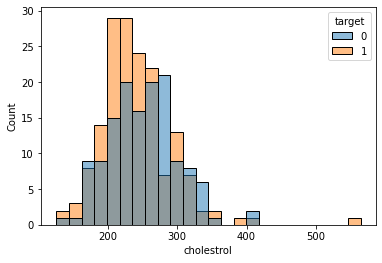

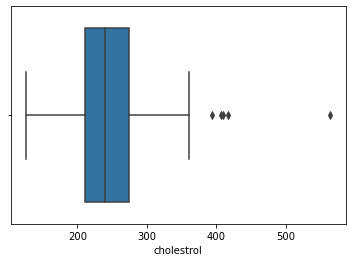

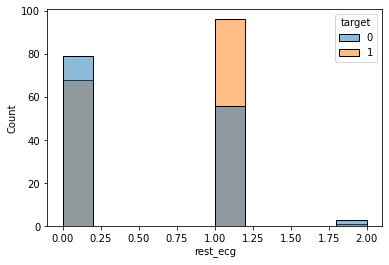

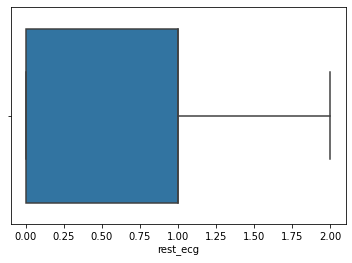

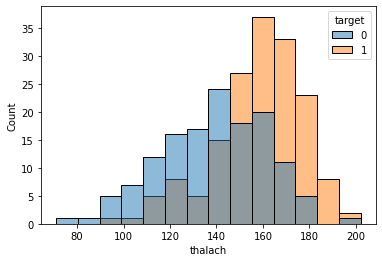

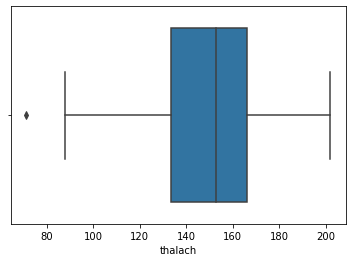

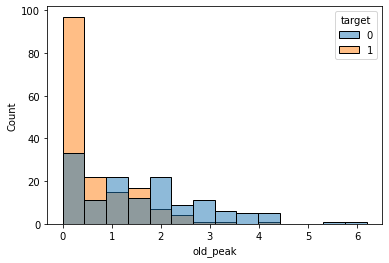

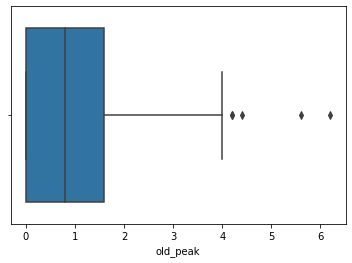

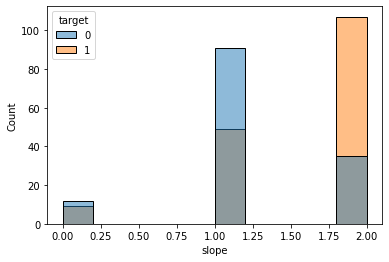

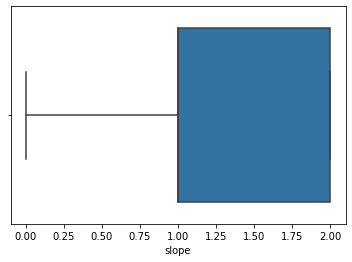

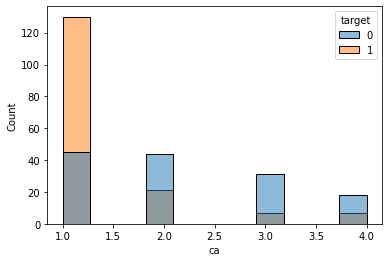

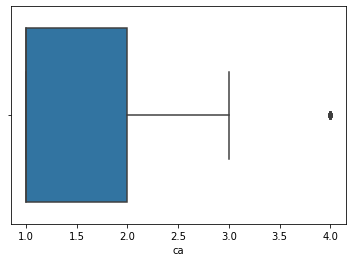

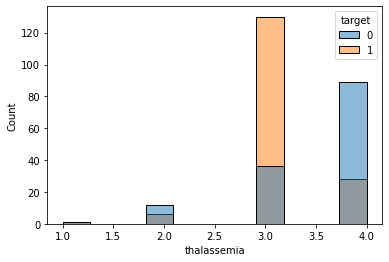

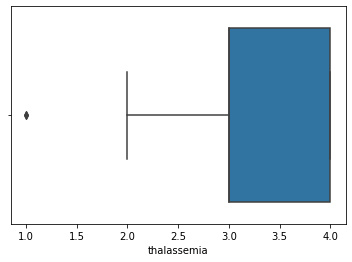

In [70]:
for column in contineous:
    plt.figure()
    sns.histplot(x=contineous[column],hue=hd['target'])
    plt.figure()
    sns.boxplot(x=contineous[column],hue=hd.target)